In [1]:
import pandas as pd
data=pd.read_csv("fremont-bridge.csv",index_col="Date")
data.head()

,West,East
Date,,
10/3/2012 0:00,4.0,9.0
10/3/2012 1:00,4.0,6.0
10/3/2012 2:00,1.0,1.0
10/3/2012 3:00,2.0,3.0
10/3/2012 4:00,6.0,1.0


In [2]:
data.index = pd.to_datetime(data.index, format="%m/%d/%Y %H:%M")

In [3]:
data.rename(columns={"West":"Fremont Bridge West Sidewalk","East":"Fremont Bridge East Sidewalk"},inplace=True)

In [4]:
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


In [5]:
data["Total"]=data["Fremont Bridge West Sidewalk"]+data["Fremont Bridge East Sidewalk"]
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


In [6]:
print(data.isnull().sum())

Fremont Bridge West Sidewalk    8
Fremont Bridge East Sidewalk    8
Total                           8
dtype: int64


In [7]:
data.dropna(inplace=True)

In [8]:
print(data.isnull().sum())

Fremont Bridge West Sidewalk    0
Fremont Bridge East Sidewalk    0
Total                           0
dtype: int64


In [9]:
data.describe()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk,Total
count,45976.000000,45976.000000,45976.000000
mean,54.712306,55.479315,110.191622
std,72.935797,80.232055,139.189603
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,28.000000,60.000000
75%,72.000000,68.000000,144.000000
max,854.000000,717.000000,1165.000000


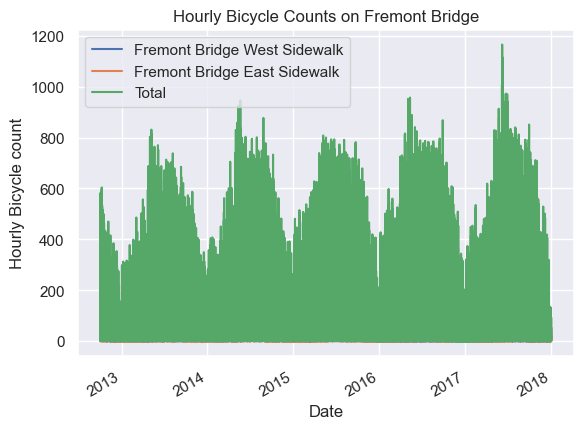

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
data.plot()
plt.ylabel("Hourly Bicycle count")
plt.title("Hourly Bicycle Counts on Fremont Bridge")
plt.grid(True)
plt.show()

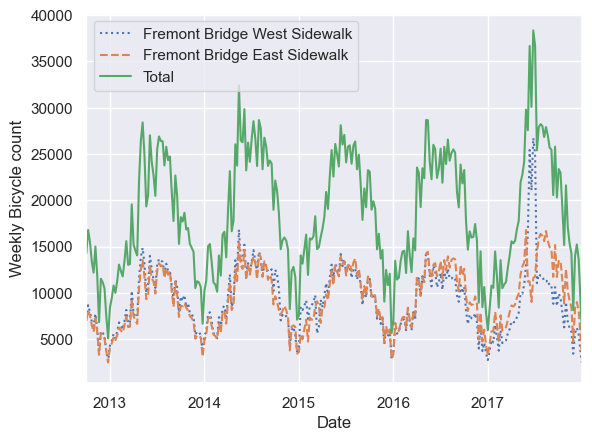

In [11]:
weekly=data.resample("W").sum()
weekly.plot(style=[":","--","-"])
plt.ylabel("Weekly Bicycle count")
plt.show()

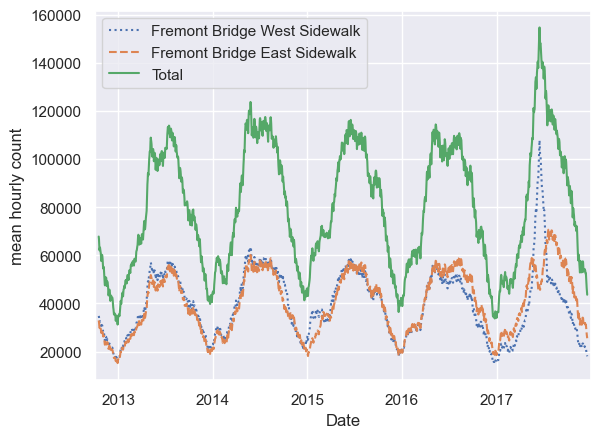

In [18]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')
plt.show()

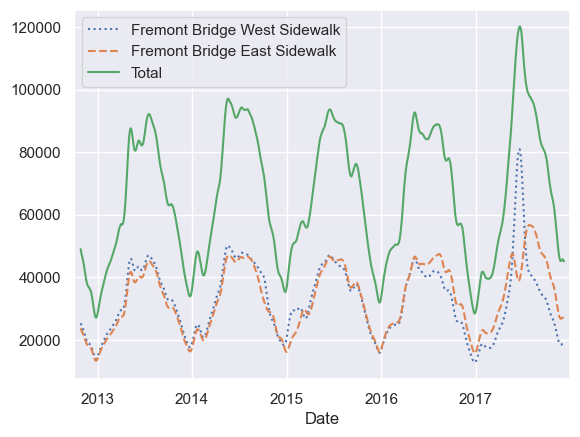

In [19]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':','--', '-'])
plt.show()    #outliners can be avoided

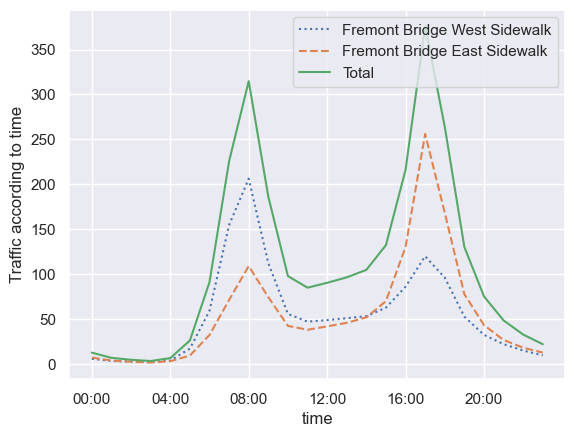

In [20]:
import numpy as np
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks= hourly_ticks, style=[':', '--', '-'])
plt.ylabel("Traffic according to time")
plt.show()